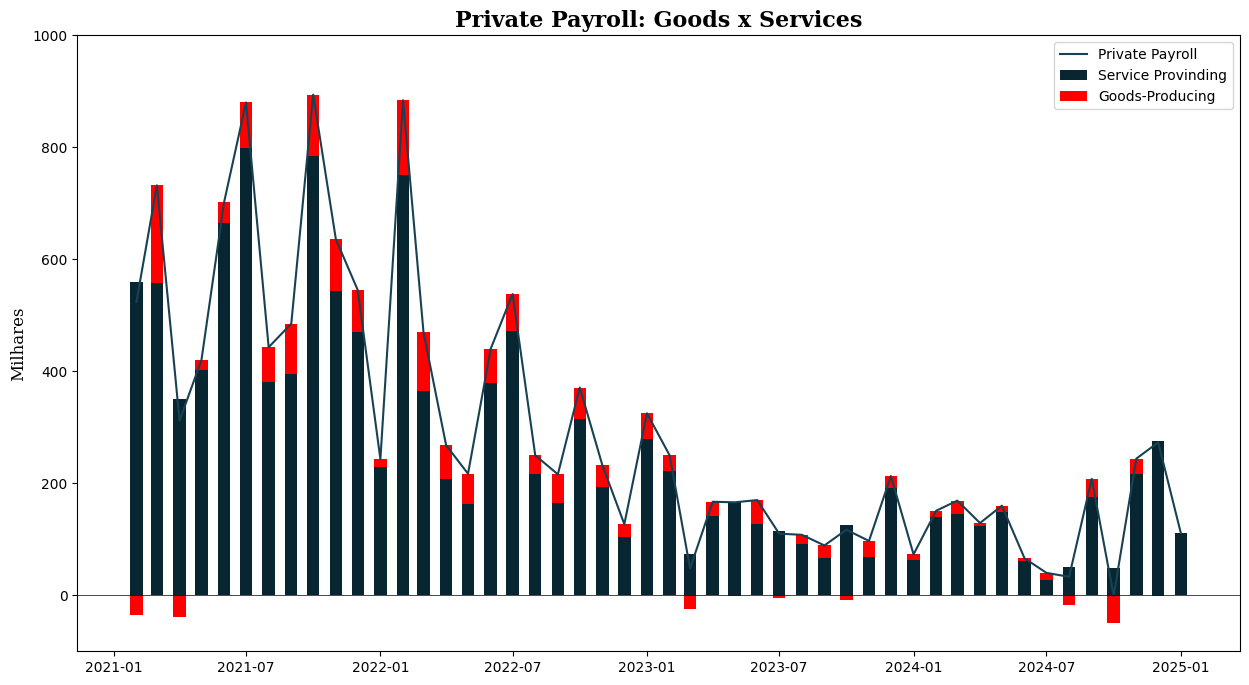

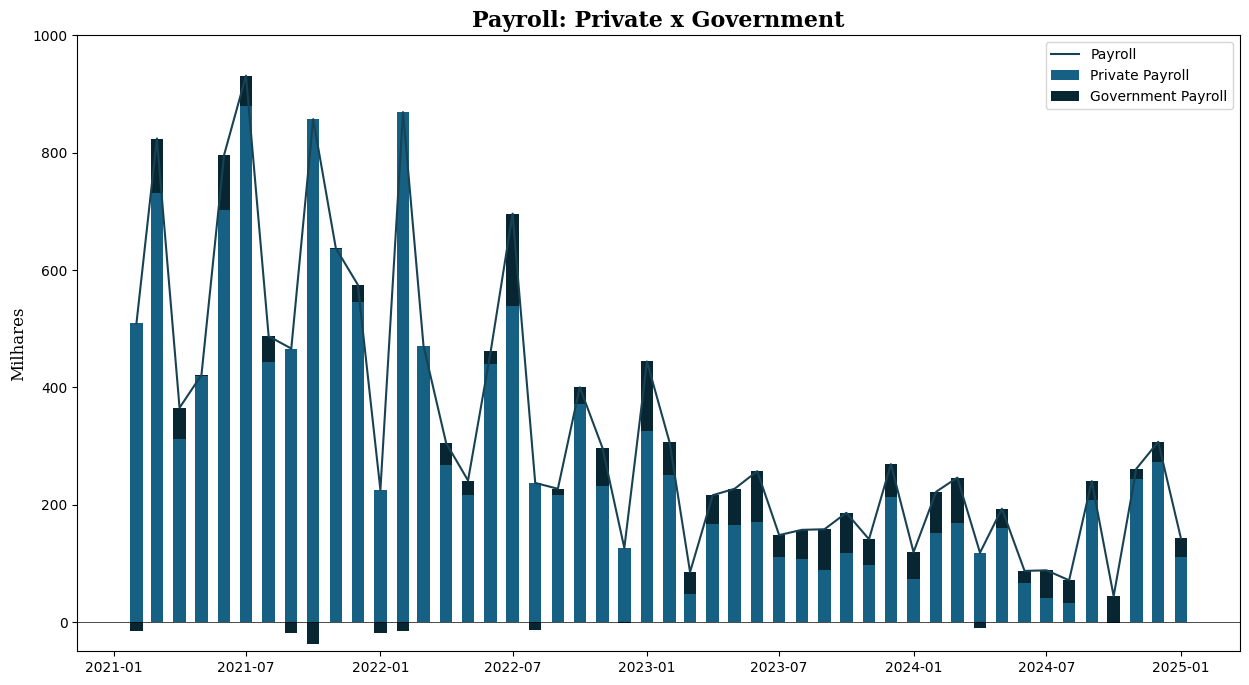

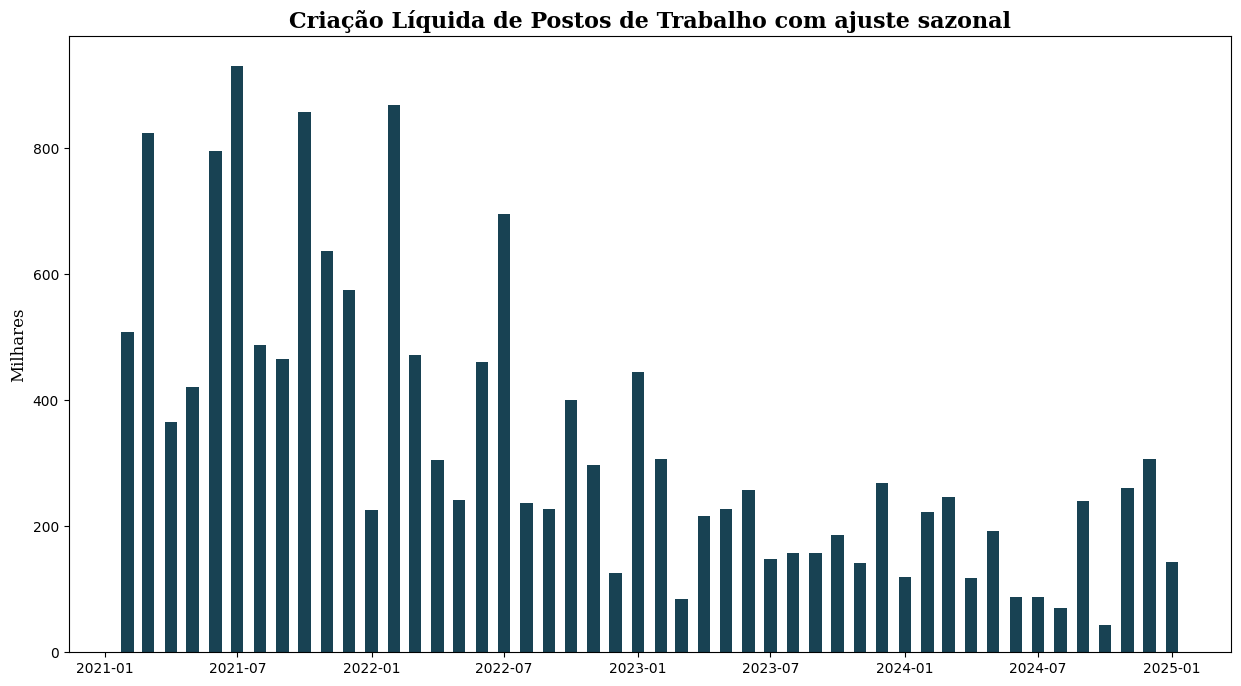

In [1]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import numpy as np 

fred = Fred(api_key="672d5598c8a41df9397cc5eb92c02d5e")#Minha chave do FED

#Pegando dados do Payroll
dados = fred.get_series("PAYEMS")
df = pd.DataFrame(dados, columns=["Total"])
df.index.name = "Date"
df["Criação Líquida de Postos de Trabalho"] = df["Total"].diff()
payroll_2324 = df.tail(48)
indice = payroll_2324.index

#Payroll do governo
government_payroll_data = fred.get_series("USGOVT")
goverment_payroll = pd.DataFrame(government_payroll_data, columns=["Total"])
goverment_payroll.index.name = "Date"
goverment_payroll["Criação Líquida de Postos de Trabalho no Governo"] = goverment_payroll["Total"].diff()
gov = goverment_payroll.tail(48)

#Payroll Privado
private_payroll_data = fred.get_series("USPRIV")
private_payroll = pd.DataFrame(private_payroll_data, columns = ["Total"])
private_payroll.index.name = "Date"
private_payroll["Criação Líquida de Postos de Trabalho no Setor Privado"] = private_payroll["Total"].diff()
priv = private_payroll.tail(48)

#Payroll privado - parte de bens
goods_payroll_data = fred.get_series("USGOOD")
goodp_payroll = pd.DataFrame(goods_payroll_data, columns = ["Total"])
goodp_payroll.index.name = "Date"
goodp_payroll["Criação Líquida de Postos de Trabalho em Bens no Setor Privado"] = goodp_payroll["Total"].diff()
good = goodp_payroll.tail(48)

#Payroll privado - parte de serviços
services_payroll_data = fred.get_series("CES0800000001")
services_private_payroll = pd.DataFrame(services_payroll_data, columns = ["Total"])
services_private_payroll.index.name = "Date"
services_private_payroll["Criação Líquida de Postos em Serviços no Setor Privado"] = services_private_payroll["Total"].diff()
servp = services_private_payroll.tail(48)

#Transformando valores em matrizes
servp_values = np.array(servp["Criação Líquida de Postos em Serviços no Setor Privado"])
good_values = np.array(good["Criação Líquida de Postos de Trabalho em Bens no Setor Privado"])

#Arrumando quem vai ficar em cima ou em baixo, a fim de que o gráfico de barras
#para que os valores negativos apareçam
bottom_good = np.where(good_values >= 0, servp_values, 0)
bottom_serv = np.where(good_values < 0, good_values, 0)

#Gráfico para setor privado: bens e serviços
plt.figure(figsize= (15,8))
plt.bar(indice, servp_values, width=17, color="#082631", label="Service Provinding")
plt.bar(indice, good_values, width=17, color="red", label="Goods-Producing", bottom=bottom_good)
plt.plot(indice, priv["Criação Líquida de Postos de Trabalho no Setor Privado"], color= '#184253', label= "Private Payroll")
plt.ylim( -100, 1000)
plt.legend()
plt.title("Private Payroll: Goods x Services", fontweight="bold", fontsize=16, family='serif')
plt.axhline(y=0, color="black",  linewidth=0.5, label="Linha no eixo X")
plt.ylabel("Milhares", fontsize = 12, family='serif')
plt.show()


#Tratando valores do payroll do governo e privado para valores negativos aparecerem
priv_values = np.array(priv["Criação Líquida de Postos de Trabalho no Setor Privado"])
gov_values = np.array(gov["Criação Líquida de Postos de Trabalho no Governo"])
bottom_gov = np.where(gov_values >= 0, priv_values, 0)
bottom_priv = np.where(gov_values < 0, gov_values, 0)

#Gráfico payroll governo e privado
plt.figure(figsize= (15,8))
plt.bar(indice, priv_values, width=17, color="#166083", label="Private Payroll", bottom=bottom_priv)
plt.bar(indice, gov_values, width=17, color="#082631", label="Government Payroll", bottom=bottom_gov)
plt.plot(indice, payroll_2324["Criação Líquida de Postos de Trabalho"], color= '#184253', label= "Payroll")
plt.ylim( - 50, 1000)
plt.legend()
plt.title("Payroll: Private x Government", fontweight="bold", fontsize=16, family='serif')
plt.axhline(y=0, color="black",  linewidth=0.5, label="Linha no eixo X")
plt.ylabel("Milhares", fontsize = 12, family='serif')
plt.show()

#Gráfico payroll
plt.figure(figsize=(15, 8))
plt.bar(indice, payroll_2324["Criação Líquida de Postos de Trabalho"], width=17, color= "#184253")
plt.title("Criação Líquida de Postos de Trabalho com ajuste sazonal", fontweight="bold", fontsize=16, family='serif')
plt.ylabel("Milhares", fontsize = 12, family='serif')
plt.show()